In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
cat /content/drive/MyDrive/YearPredictionMSD.txt > yp.csv

In [4]:
df1=pd.read_csv('yp.csv')

In [5]:
column_names = ['year'] + ['timbre_avg{}'.format(i) for i in range(1, 13)] + ['covariance{}'.format(i) for i in range(1, 79)]
dataset = pd.read_csv('yp.csv', names=column_names)

In [9]:
print("Dataset dimensions:", dataset.shape)

Dataset dimensions: (515345, 91)


In [10]:
print(dataset.head())

   year  timbre_avg1  timbre_avg2  timbre_avg3  timbre_avg4  timbre_avg5  \
0  2001     49.94357     21.47114     73.07750      8.74861    -17.40628   
1  2001     48.73215     18.42930     70.32679     12.94636    -10.32437   
2  2001     50.95714     31.85602     55.81851     13.41693     -6.57898   
3  2001     48.24750     -1.89837     36.29772      2.58776      0.97170   
4  2001     50.97020     42.20998     67.09964      8.46791    -15.85279   

   timbre_avg6  timbre_avg7  timbre_avg8  timbre_avg9  ...  covariance69  \
0    -13.09905    -25.01202    -12.23257      7.83089  ...      13.01620   
1    -24.83777      8.76630     -0.92019     18.76548  ...       5.66812   
2    -18.54940     -3.27872     -2.35035     16.07017  ...       3.03800   
3    -26.21683      5.05097    -10.34124      3.55005  ...      34.57337   
4    -16.81409    -12.48207     -9.37636     12.63699  ...       9.92661   

   covariance70  covariance71  covariance72  covariance73  covariance74  \
0     -54.4

In [11]:
print(dataset.dtypes)

year              int64
timbre_avg1     float64
timbre_avg2     float64
timbre_avg3     float64
timbre_avg4     float64
                 ...   
covariance74    float64
covariance75    float64
covariance76    float64
covariance77    float64
covariance78    float64
Length: 91, dtype: object


In [6]:
timbre_avg_features = ['timbre_avg{}'.format(i) for i in range(1, 13)]
timbre_covariance_features = ['covariance{}'.format(i) for i in range(1, 79)]

# Data pre processing & Model Implementation

In [7]:
df=dataset

In [8]:
import numpy as np
from scipy import stats

# Calculate z-scores for each feature
z_scores = np.abs(stats.zscore(df))

# Define threshold for outlier detection
threshold = 3

# Flag outliers
outlier_flags = np.where(z_scores > threshold, True, False)

# Remove outliers
df_cleaned = df[~np.any(outlier_flags, axis=1)]

In [9]:
print("Dataset dimensions:", df_cleaned.shape)

Dataset dimensions: (367348, 91)


In [17]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 367348 entries, 0 to 515344
Data columns (total 91 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          367348 non-null  int64  
 1   timbre_avg1   367348 non-null  float64
 2   timbre_avg2   367348 non-null  float64
 3   timbre_avg3   367348 non-null  float64
 4   timbre_avg4   367348 non-null  float64
 5   timbre_avg5   367348 non-null  float64
 6   timbre_avg6   367348 non-null  float64
 7   timbre_avg7   367348 non-null  float64
 8   timbre_avg8   367348 non-null  float64
 9   timbre_avg9   367348 non-null  float64
 10  timbre_avg10  367348 non-null  float64
 11  timbre_avg11  367348 non-null  float64
 12  timbre_avg12  367348 non-null  float64
 13  covariance1   367348 non-null  float64
 14  covariance2   367348 non-null  float64
 15  covariance3   367348 non-null  float64
 16  covariance4   367348 non-null  float64
 17  covariance5   367348 non-null  float64
 18  cova

In [10]:
X = df_cleaned.drop(['year'], axis=1)
y = df_cleaned['year']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=128)

Feature Scaling

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Feature Selection

In [17]:
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.ensemble import RandomForestRegressor


# Correlation Analysis
correlation_matrix = pd.DataFrame(X_train_scaled).corrwith(y_train)
correlation_scores = correlation_matrix.abs().sort_values(ascending=False)

# Univariate Feature Selection
univariate_selector = SelectKBest(score_func=f_regression, k=60)
X_train_selected = univariate_selector.fit_transform(X_train_scaled, y_train)
selected_features_indices = univariate_selector.get_support(indices=True)

# Print the selected features based on each technique
print("Top correlated features:")
print(correlation_scores.head())

print("\nTop univariate selected features:")
print(X_train.columns[selected_features_indices])


Top correlated features:
21    0.005930
5     0.005768
19    0.005404
23    0.005365
88    0.004902
dtype: float64

Top univariate selected features:
Index(['timbre_avg1', 'timbre_avg3', 'timbre_avg4', 'timbre_avg6',
       'timbre_avg7', 'timbre_avg8', 'timbre_avg10', 'timbre_avg12',
       'covariance1', 'covariance2', 'covariance3', 'covariance8',
       'covariance9', 'covariance10', 'covariance12', 'covariance13',
       'covariance14', 'covariance15', 'covariance17', 'covariance19',
       'covariance21', 'covariance24', 'covariance25', 'covariance26',
       'covariance27', 'covariance28', 'covariance29', 'covariance30',
       'covariance31', 'covariance34', 'covariance35', 'covariance37',
       'covariance41', 'covariance42', 'covariance43', 'covariance45',
       'covariance47', 'covariance48', 'covariance49', 'covariance50',
       'covariance51', 'covariance53', 'covariance55', 'covariance56',
       'covariance57', 'covariance58', 'covariance60', 'covariance61',
       'c

In [21]:
selected_features = X.columns[univariate_selector.get_support()]

Linear Regression using Selected Features

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X_train_selected = X_train_scaled[:, selected_features_indices]
X_test_selected = X_test_scaled[:, selected_features_indices]

linear_regression = LinearRegression()
linear_regression.fit(X_train_selected, y_train)

y_pred = linear_regression.predict(X_test_selected)

# Calculating evaluation metrics
mse_lr = mean_squared_error(y_test, y_pred)
mae_lr = mean_absolute_error(y_test, y_pred)
r2_lr = r2_score(y_test, y_pred)

# Printing the evaluation metrics
print("Mean Squared Error:", mse_lr)
print("Mean Absolute Error:", mae_lr)
print("R-squared:", r2_lr)


Mean Squared Error: 73.91331299070751
Mean Absolute Error: 6.412050941283462
R-squared: 0.248066262850537


XGBoost using Selected features

In [25]:
import xgboost as xgb

# Creating the XGBoost data matrices using selected features
X_train_selected = X_train_scaled[:, selected_features_indices]
X_test_selected = X_test_scaled[:, selected_features_indices]

# Initializing the XGBoost regressor
xgb_regressor = xgb.XGBRegressor()

# Training the model
xgb_regressor.fit(X_train_selected, y_train)

# Making predictions on the test set
y_pred = xgb_regressor.predict(X_test_selected)

# Calculating evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Printing the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


Mean Squared Error: 67.06810111024004
Mean Absolute Error: 6.013172731978897
R-squared: 0.3177038632041691


### **Using Models without certain selected features, but they are scaled and cleaned**


1.   Linear Regression
2.   MLP Regression
3.   Ridge Regression
4.   RFE Regressor
5.   XGBoost Regressor
6.   Gradient Boost Regressor
7.   Decision Tree Regressor
8.   K-Nearest Neighbors Regression
9.   Random Forest Regression





In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

linear_regression = LinearRegression()
linear_regression.fit(X_train_scaled, y_train)

y_pred = linear_regression.predict(X_test_scaled)

mse_lr = mean_squared_error(y_test, y_pred)
mae_lr = mean_absolute_error(y_test, y_pred)
r2_lr = r2_score(y_test, y_pred)

In [24]:
print (mse_lr)
print (mae_lr)
print (r2_lr)

67.62612677368217
6.0216632860194
0.31202696542270847


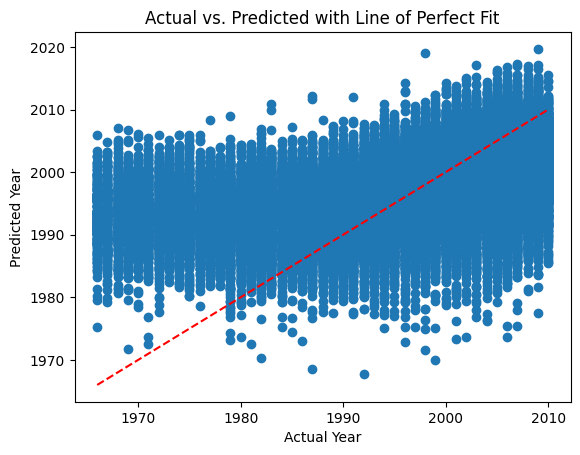

In [ ]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linestyle='--')
plt.xlabel('Actual Year')
plt.ylabel('Predicted Year')
plt.title('Actual vs. Predicted with Line of Perfect Fit')
plt.show()

In [ ]:
from sklearn.neural_network import MLPRegressor

X = df_cleaned.drop(['year'], axis=1)
y = df_cleaned['year']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=128)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp = MLPRegressor(hidden_layer_sizes=(100, 100), activation='relu', solver='adam', random_state=42)
mlp.fit(X_train_scaled, y_train)

y_pred = mlp.predict(X_test_scaled)

mse_mlp = mean_squared_error(y_test, y_pred)
mae_mlp = mean_absolute_error(y_test, y_pred)
r2_mlp = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse_mlp)
print("Mean Absolute Error:", mae_mlp)
print("R-squared:", r2_mlp)

Mean Squared Error: 86.52408418116754
Mean Absolute Error: 6.836430971029357
R-squared: 0.11977456645787854


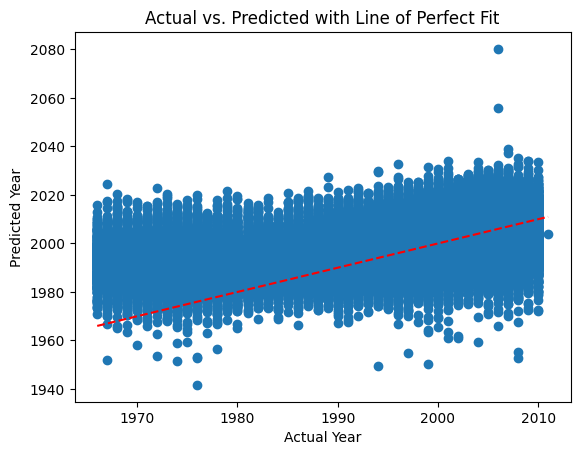

In [ ]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linestyle='--')
plt.xlabel('Actual Year')
plt.ylabel('Predicted Year')
plt.title('Actual vs. Predicted with Line of Perfect Fit')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Create and train the Ridge regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = ridge_model.predict(X_test_scaled)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


Mean Squared Error: 67.62612640887085
Mean Absolute Error: 6.021664859863173
R-squared: 0.3120269691340012


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge

ridge_model = Ridge()

# Perform Recursive Feature Elimination (RFE)
rfe = RFE(estimator=ridge_model, n_features_to_select=20)
X_train_rfe = rfe.fit_transform(X_train_scaled, y_train)
X_test_rfe = rfe.transform(X_test_scaled)

# Fit the model on the selected features
ridge_model.fit(X_train_rfe, y_train)

# Make predictions on the test set
y_pred = ridge_model.predict(X_test_rfe)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 69.61892524892703
Mean Absolute Error: 6.115711392505894
R-squared: 0.29175385975005375


In [ ]:
import xgboost as xgb

# Initialize the XGBoost regressor
xgb_regressor = xgb.XGBRegressor()

# Train the model
xgb_regressor.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = xgb_regressor.predict(X_test_scaled)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


Mean Squared Error: 62.95604575827233
Mean Absolute Error: 5.75894652605868
R-squared: 0.3595365591429813


In [28]:
from sklearn.ensemble import GradientBoostingRegressor

# Gradient Boosting Regression
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model.fit(X_train_scaled, y_train)
gb_predictions = gb_model.predict(X_test_scaled)

gb_mse = mean_squared_error(y_test, gb_predictions)
gb_mae = mean_absolute_error(y_test, gb_predictions)
gb_r2 = r2_score(y_test, gb_predictions)

In [29]:
print("Mean Squared Error:", gb_mse)
print("Mean Absolute Error:", gb_mae)
print("R-squared:", gb_r2)

Mean Squared Error: 67.31151790367437
Mean Absolute Error: 5.981433785691035
R-squared: 0.315227539362549


In [30]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor(max_depth=10)
dt_reg.fit(X_train_scaled, y_train)

y_pred_dt = dt_reg.predict(X_test_scaled)

mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

In [31]:
print (mse_dt)
print (mae_dt)
print (r2_dt)

75.82398032624934
6.289597258519318
0.2286286923787061


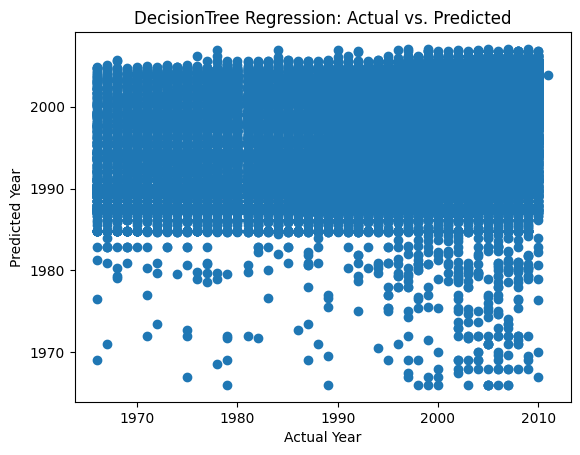

In [32]:
plt.scatter(y_test, y_pred_dt)
plt.xlabel('Actual Year')
plt.ylabel('Predicted Year')
plt.title('DecisionTree Regression: Actual vs. Predicted')
plt.show()

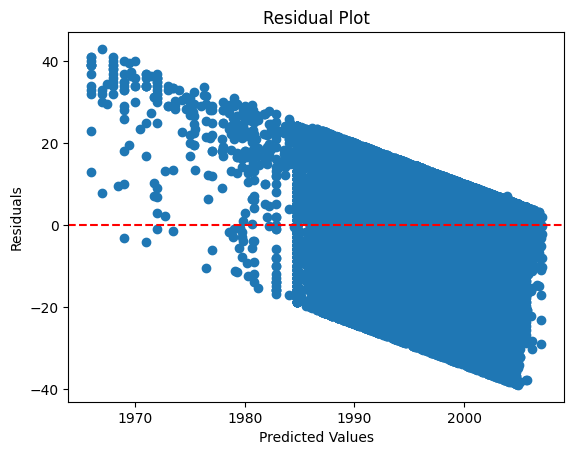

In [33]:
residuals = y_test - y_pred_dt
plt.scatter(y_pred_dt, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

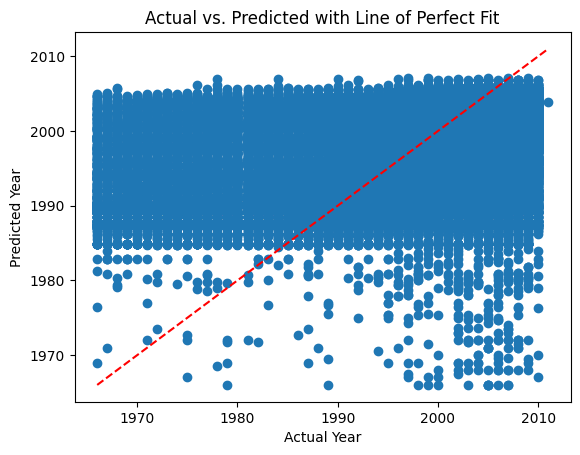

In [34]:
plt.scatter(y_test, y_pred_dt)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linestyle='--')
plt.xlabel('Actual Year')
plt.ylabel('Predicted Year')
plt.title('Actual vs. Predicted with Line of Perfect Fit')
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the K-Nearest Neighbors Regression model
knn = KNeighborsRegressor(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


Mean Squared Error: 113.03523464863342
Mean Absolute Error: 7.7690420980120125
R-squared: 0.05024395563161144


Random Forest Model done on the first collab sheet, it took more than 2 hours to execute



---





---



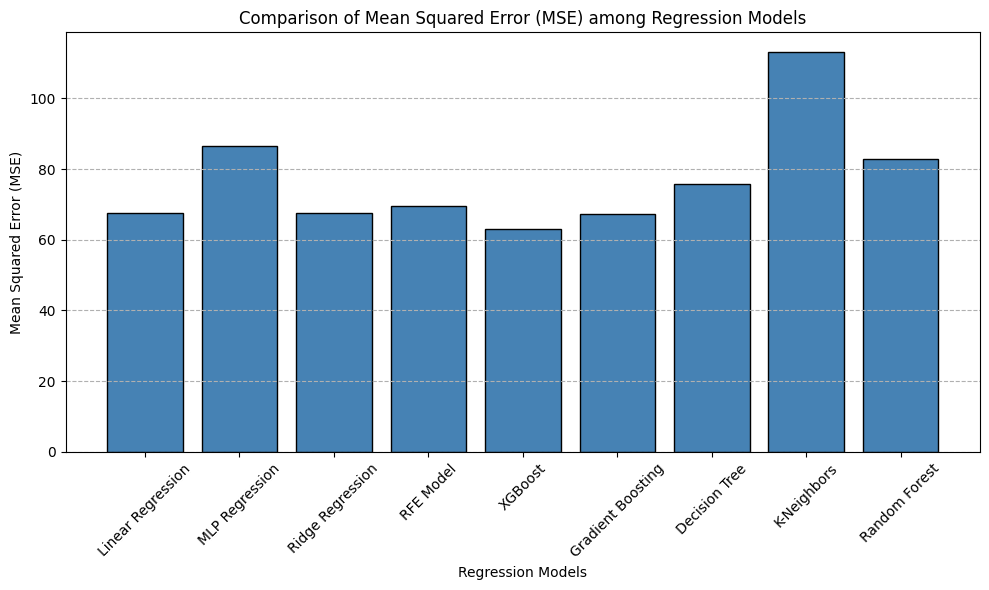

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# MSE Comparison Graph
models = ['Linear Regression', 'MLP Regression', 'Ridge Regression', 'RFE Model', 'XGBoost',
          'Gradient Boosting', 'Decision Tree', 'K-Neighbors', 'Random Forest']
mse_values = [67.62612677368217, 86.52408418116754, 67.62612640887085, 69.61892524892703,
              62.95604575827233, 67.31151790367437, 75.82398032624934, 113.03523464863342, 82.8182728724382]

plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, color='steelblue', edgecolor='black')
plt.xlabel('Regression Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of Mean Squared Error (MSE) among Regression Models')
plt.xticks(rotation=45)
plt.ylim(bottom=0)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

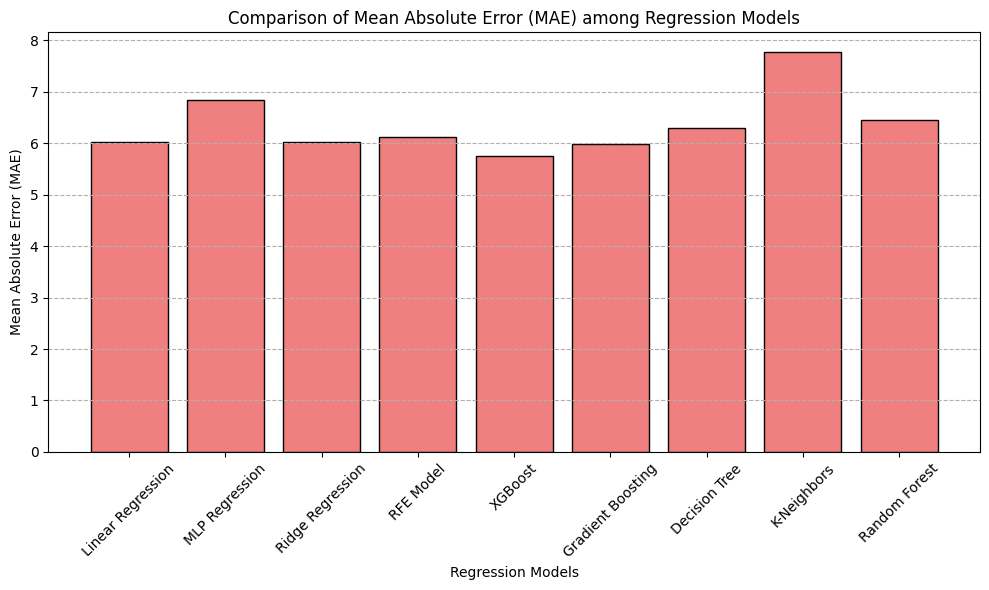

In [37]:
# MAE Comparison Graph
mae_values = [6.0216632860194, 6.836430971029357, 6.021664859863173, 6.115711392505894,
              5.75894652605868, 5.981433785691035, 6.289597258519318, 7.7690420980120125, 6.462108322256611]

plt.figure(figsize=(10, 6))
plt.bar(models, mae_values, color='lightcoral', edgecolor='black')
plt.xlabel('Regression Models')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Comparison of Mean Absolute Error (MAE) among Regression Models')
plt.xticks(rotation=45)
plt.ylim(bottom=0)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

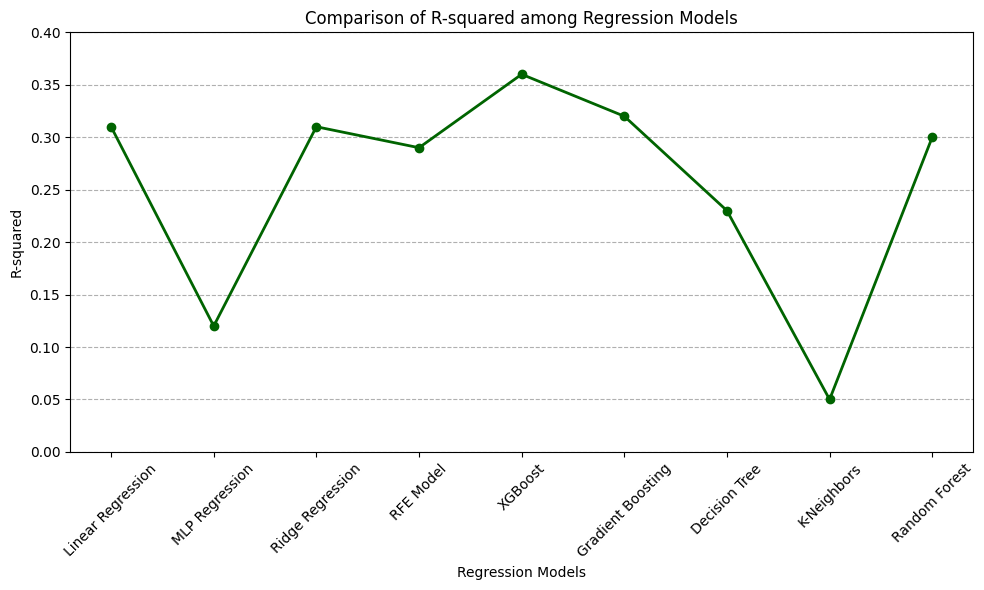

In [38]:
# R-squared Comparison Line Graph
r2_values = [0.31, 0.12, 0.31, 0.29, 0.36, 0.32, 0.23, 0.05, 0.30]

plt.figure(figsize=(10, 6))
plt.plot(models, r2_values, marker='o', color='darkgreen', linewidth=2)
plt.xlabel('Regression Models')
plt.ylabel('R-squared')
plt.title('Comparison of R-squared among Regression Models')
plt.xticks(rotation=45)
plt.ylim(0, 0.4)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

In [39]:
data = {
    'Model': ['Linear Regression', 'MLP Regression', 'Ridge Regression', 'RFE Model', 'XGBoost',
              'Gradient Boosting', 'Decision Tree', 'K-Neighbors', 'Random Forest'],
    'MSE': [67.62612677368217, 86.52408418116754, 67.62612640887085, 69.61892524892703,
            62.95604575827233, 67.31151790367437, 75.82398032624934, 113.03523464863342, 82.8182728724382],
    'MAE': [6.0216632860194, 6.836430971029357, 6.021664859863173, 6.115711392505894,
            5.75894652605868, 5.981433785691035, 6.289597258519318, 7.7690420980120125, 6.462108322256611],
    'R-squared': [0.31202696542270847, 0.11977456645787854, 0.3120269691340012, 0.29175385975005375,
                  0.3595365591429813, 0.315227539362549, 0.2286286923787061, 0.05024395563161144, 0.3041359582323857]
}

# Create a DataFrame using the dictionary
df3 = pd.DataFrame(data)

# Display the DataFrame
print(df3)

               Model         MSE       MAE  R-squared
0  Linear Regression   67.626127  6.021663   0.312027
1     MLP Regression   86.524084  6.836431   0.119775
2   Ridge Regression   67.626126  6.021665   0.312027
3          RFE Model   69.618925  6.115711   0.291754
4            XGBoost   62.956046  5.758947   0.359537
5  Gradient Boosting   67.311518  5.981434   0.315228
6      Decision Tree   75.823980  6.289597   0.228629
7        K-Neighbors  113.035235  7.769042   0.050244
8      Random Forest   82.818273  6.462108   0.304136


### Was trying to enhance the accuracy of models but somehow ended up overfitting the models and accuracies were almost 100%

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select the feature columns
feature_columns = df_cleaned.columns.drop('year')

# Apply feature scaling
scaler = StandardScaler()
df_scaled = df_cleaned.copy()
df_scaled[feature_columns] = scaler.fit_transform(df_cleaned[feature_columns])


In [ ]:
from sklearn.preprocessing import StandardScaler

# Perform feature scaling on the cleaned dataset
scaler = StandardScaler()
df_cleaned_scaled = scaler.fit_transform(df_cleaned)



In [ ]:
import pandas as pd
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

# Assuming you have your cleaned and scaled DataFrame as df_cleaned

# Separate the feature matrix (X) and target variable (y)
X = df_cleaned.drop('year', axis=1)
y = df_cleaned['year']

# Split the data into training and testing sets (optional)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Adjust test_size as needed

# Initialize Lasso model
lasso = Lasso(alpha=0.1)  # You can adjust the regularization strength (alpha) as needed

# Perform feature selection
lasso_selector = SelectFromModel(lasso)
X_train_selected = lasso_selector.fit_transform(X_train, y_train)

# Get the selected feature indices
selected_feature_indices = lasso_selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_feature_indices]

# Use the selected features for training your model
X_train_selected = X_train[selected_features]



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
target_variable = df_cleaned['year']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_cleaned_scaled, target_variable, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
regression_model = LinearRegression()

# Fit the model to the training data
regression_model.fit(X_train, y_train)

# Predict on the test set
y_pred = regression_model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


Mean Squared Error: 0.0
Mean Absolute Error: 0.0
R-squared: 1.0


In [ ]:
print(X_train)

[[ 0.03290793  0.68135765 -0.07146394 ...  1.10975514 -0.52309057
   0.35369754]
 [ 0.94198167  0.60455673 -0.44756442 ... -0.78499915 -2.6575643
  -1.9187449 ]
 [ 0.03290793 -0.55623687 -2.03534899 ...  0.17241841 -1.82433136
   1.09251898]
 ...
 [ 0.13391612 -0.46904737  0.03039588 ...  0.61323021 -0.391879
  -0.99667735]
 [ 0.03290793  0.83173574 -0.20463587 ...  0.47241464 -0.50315044
  -0.30922953]
 [ 0.84097348 -0.33680827  0.1054252  ...  1.428629    0.27675667
  -0.44346339]]


In [ ]:
print(y_train)

264440    1999
440591    2008
262297    1999
458204    2009
65636     2007
          ... 
362936    1993
513090    2009
184068    2000
204769    1999
170353    2007
Name: year, Length: 293878, dtype: int64


In [ ]:
print(y_pred)

[2002.00000178 1999.00000807 1981.00008406 ... 1999.99999415 2007.99996897
 1988.00006529]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
target_variable = df_cleaned['year']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_cleaned_scaled, target_variable, test_size=0.2, random_state=42)

# Create and train the Ridge regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = ridge_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


Mean Squared Error: 1.6349787538307757e-09
Mean Absolute Error: 2.9551179960824622e-05
R-squared: 0.9999999999832516


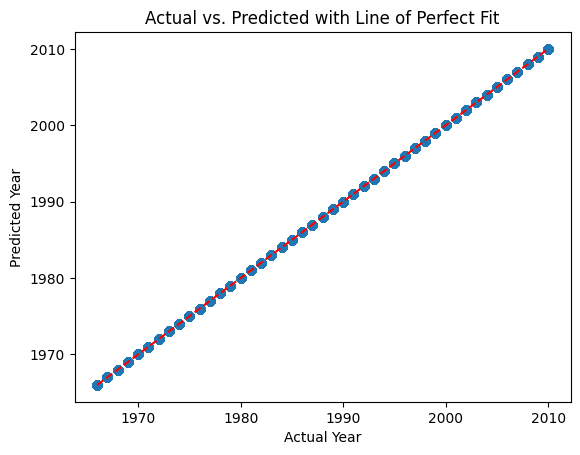

In [ ]:
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linestyle='--')
plt.xlabel('Actual Year')
plt.ylabel('Predicted Year')
plt.title('Actual vs. Predicted with Line of Perfect Fit')
plt.show()